<a href="https://colab.research.google.com/github/s-im-ran/Deep-Learning/blob/main/DataAugmentation_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LEARNING DATA AUGMENTATION IN TENSORFLOW USING FLOWERS CLASSIFICATION

In [3]:
!pip install tensorflow

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import  PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_dir="/content/drive/MyDrive/flower_photos"
data_dir

'/content/drive/MyDrive/flower_photos'

In [7]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir
#converting path to windows path object

PosixPath('/content/drive/MyDrive/flower_photos')

In [8]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
daisy=list(data_dir.glob('roses/*'))
daisy[:5]

[PosixPath('/content/drive/MyDrive/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('/content/drive/MyDrive/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/content/drive/MyDrive/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('/content/drive/MyDrive/flower_photos/roses/7551637034_55ae047756_n.jpg'),
 PosixPath('/content/drive/MyDrive/flower_photos/roses/5736328472_8f25e6f6e7.jpg')]

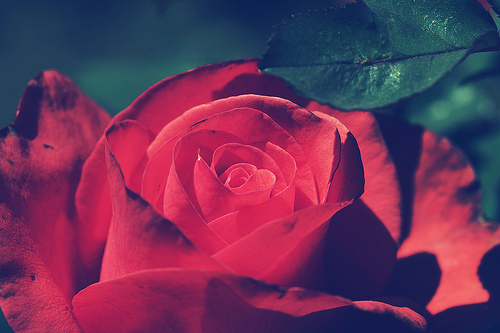

In [10]:
PIL.Image.open(str(daisy[4]))

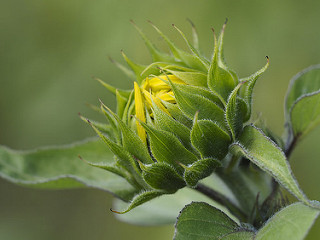

In [11]:
sunflowers=list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[3]))

In [12]:

flower_images_dict = {
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('daisy/*')),
    'roses': list(data_dir.glob('daisy/*')),
    'sunflowers': list(data_dir.glob('daisy/*')),
    'tulips': list(data_dir.glob('daisy/*'))
}




In [13]:
flower_labels_dict={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}

In [14]:
flower_images_dict['roses'][0]

PosixPath('/content/drive/MyDrive/flower_photos/daisy/7568630428_8cf0fc16ff_n.jpg')

In [15]:
img=cv2.imread(str(flower_images_dict['roses'][0]))
#cv2 does on work on path and then needs to be converted to string in order for cv2 tp convert it to a numpy array
img.shape

(239, 320, 3)

In [17]:
X,y=[],[]
for flower_name ,images in flower_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flower_labels_dict[flower_name])


In [18]:
  X=np.array(X)
  y=np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_tain,y_test=train_test_split(X,y,random_state=0)

In [20]:
len(X_train)

2373

In [22]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [23]:
X_train[0]

array([[[  1,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  1,   0,   2],
        [  0,   0,   0],
        [  0,   0,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 54, 125,  75],
        [ 35,  99,  44],
        [ 16,  52,  18],
        ...,
        [  7,  38,  20],
        [  4,  15,   5],
        [  9,  40,  26]],

       [[ 33,  99,  41],
        [ 22,  75,  33],
        [ 18,  41,  20],
        ...,
        [ 17,  60,  35],
        [ 42, 105,  87],
        [  9,  40,  27]],

       [[ 22,  87,  34],
        [ 19,  62,  25],
        [ 14,  34,  18],
        ...,
        [ 18,  69,  43],
        [ 32,  92,  76],
        [ 11,  38,  20]]

In [32]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.fit(X_train_scaled,y_tain,epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 [==============================] - 5s 26ms/step - loss: 1.6111 - accuracy: 0.1930
Epoch 2/30
75/75 [==============================] - 2s 24ms/step - loss: 1.6100 - accuracy: 0.1993
Epoch 3/30
75/75 [==============================] - 2s 22ms/step - loss: 1.6099 - accuracy: 0.1896
Epoch 4/30
75/75 [==============================] - 2s 21ms/step - loss: 1.6097 - accuracy: 0.1997
Epoch 5/30
75/75 [==============================] - 2s 21ms/step - loss: 1.6095 - accuracy: 0.1905
Epoch 6/30
75/75 [==============================] - 2s 20ms/step - loss: 1.6095 - accuracy: 0.1922
Epoch 7/30
75/75 [==============================] - 1s 20ms/step - loss: 1.6095 - accuracy: 0.2002
Epoch 8/30
75/75 [==============================] - 1s 20ms/step - loss: 1.6094 - accuracy: 0.2031
Epoch 9/30
75/75 [==============================] - 1s 20ms/step - loss: 1.6094 - accuracy: 0.2023
Epoch 10/30
75/75 [==============================] - 2s 24ms/step - loss: 1.6094 - accuracy: 0.1901
Epoch 11/30
75/75 [=

In [34]:
model.evaluate(X_test_scaled,y_test)

25/25 [==============================] - 1s 19ms/step - loss: 1.6106 - accuracy: 0.1919


[1.610558271408081, 0.19191919267177582]

In [35]:
predictions=model.predict(X_test_scaled)

25/25 [==============================] - 1s 15ms/step


In [36]:
predictions

array([[0.20023495, 0.19346848, 0.2021188 , 0.20187399, 0.20230377],
       [0.20023495, 0.19346848, 0.2021188 , 0.20187399, 0.20230377],
       [0.20023495, 0.19346848, 0.2021188 , 0.20187399, 0.20230377],
       ...,
       [0.20023495, 0.19346848, 0.2021188 , 0.20187399, 0.20230377],
       [0.20023495, 0.19346848, 0.2021188 , 0.20187399, 0.20230377],
       [0.20023495, 0.19346848, 0.2021188 , 0.20187399, 0.20230377]],
      dtype=float32)

In [38]:
score=tf.nn.softmax(predictions)

In [39]:
score

<tf.Tensor: shape=(792, 5), dtype=float32, numpy=
array([[0.20004585, 0.19869682, 0.20042308, 0.20037402, 0.20046015],
       [0.20004585, 0.19869682, 0.20042308, 0.20037402, 0.20046015],
       [0.20004585, 0.19869682, 0.20042308, 0.20037402, 0.20046015],
       ...,
       [0.20004585, 0.19869682, 0.20042308, 0.20037402, 0.20046015],
       [0.20004585, 0.19869682, 0.20042308, 0.20037402, 0.20046015],
       [0.20004585, 0.19869682, 0.20042308, 0.20037402, 0.20046015]],
      dtype=float32)>

In [41]:
np.argmax(score[0])

4

In [42]:
y_test[0]

4

In [51]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3))

])

In [52]:
num_classes=5
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model.fit(X_train_scaled,y_tain,epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 [==============================] - 7s 29ms/step - loss: 1.6115 - accuracy: 0.1947
Epoch 2/30
75/75 [==============================] - 2s 27ms/step - loss: 1.6097 - accuracy: 0.2010
Epoch 3/30
75/75 [==============================] - 2s 29ms/step - loss: 1.6098 - accuracy: 0.1905
Epoch 4/30
75/75 [==============================] - 2s 32ms/step - loss: 1.6096 - accuracy: 0.1943
Epoch 5/30
75/75 [==============================] - 2s 32ms/step - loss: 1.6098 - accuracy: 0.1985
Epoch 6/30
75/75 [==============================] - 2s 29ms/step - loss: 1.6095 - accuracy: 0.1989
Epoch 7/30
75/75 [==============================] - 2s 27ms/step - loss: 1.6096 - accuracy: 0.1951
Epoch 8/30
75/75 [==============================] - 2s 27ms/step - loss: 1.6097 - accuracy: 0.1905
Epoch 9/30
75/75 [==============================] - 2s 27ms/step - loss: 1.6095 - accuracy: 0.2027
Epoch 10/30
75/75 [==============================] - 2s 33ms/step - loss: 1.6095 - accuracy: 0.1884
Epoch 11/30
75/75 [=

In [54]:
model.evaluate(X_test_scaled,y_test)

25/25 [==============================] - 0s 11ms/step - loss: 1.6109 - accuracy: 0.1919


[1.6108903884887695, 0.19191919267177582]